# Understanding Movie Preferences

<img src="images/cinema.jpg"/>

In Unit 6, we were introduced to a MovieLens dataset containing movies and their associated genres, and clustered movies accordingly. In addition to collecting data on movies and genres, MovieLens collects data on users and their ratings of movies.

We collected the “latest” MovieLens dataset in September 2018 from https://grouplens.org/datasets/movielens/, and used it to create a new dataset that aggregates user ratings by the genres of the movies (omitting users who had rated less than 500 or over 2000 movies).

Dataset: movielens-user-genre-ratings.csv

Our dataset has the following columns:

    userId: a unique integer identifying a user

    action, adventure, …, *western**: the sum of all the ratings that this user has rated any movies corresponding to these genres. For example, the user with userID = 24 has action = 431, which means that the sum of the ratings of any action movies this user saw is 431. For brevity, we will refer to this “sum of all the ratings” value as the score of the genre for the user. Note that number of movies that a user has watched of the genre as well as the ratings that the user gave to each movie BOTH contribute to the score of a movie.

In this problem, we aim to cluster users by the genres of movies they watch.

### Exploratory Data Analysis
Read the dataset movielens-user-genre-ratings.csv into a dataframe called ratings.

In [1]:
# Load the Dataset

ratings = read.csv("data/movielens-user-genre-ratings.csv")

head(ratings)

,userId,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film.noir,horror,imax,musical,mystery,romance,sci.fi,thriller,war,western
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,24,431.0,384.0,40.0,101,917.0,351.0,54,1085.0,153.0,20.0,151.0,8.0,64,108,407,199.0,396.0,122.0,69.0
2,46,845.0,532.5,127.0,179,969.0,328.5,22,765.5,287.5,14.5,482.0,19.5,56,192,287,494.0,779.5,87.0,82.0
3,120,220.5,320.0,120.5,116,849.5,259.5,20,1034.5,241.0,16.5,74.5,19.5,71,139,413,209.5,296.0,103.5,30.5
4,132,292.0,302.0,85.0,110,759.0,335.0,25,1091.0,172.0,35.0,122.0,7.0,84,160,403,183.0,394.0,100.0,28.0
5,150,336.0,173.0,20.0,41,636.0,317.0,36,953.0,129.0,22.0,282.0,3.0,37,144,234,241.0,483.0,76.0,28.0
6,229,580.0,531.0,157.0,230,1287.0,480.0,104,1964.0,363.0,89.0,359.0,9.0,243,281,589,498.0,732.0,173.0,70.0


In [2]:
str(ratings)

'data.frame':	9144 obs. of  20 variables:
 $ userId     : int  24 46 120 132 150 229 231 251 332 340 ...
 $ action     : num  431 845 220 292 336 ...
 $ adventure  : num  384 532 320 302 173 ...
 $ animation  : num  40 127 120 85 20 ...
 $ children   : num  101 179 116 110 41 ...
 $ comedy     : num  917 969 850 759 636 ...
 $ crime      : num  351 328 260 335 317 ...
 $ documentary: num  54 22 20 25 36 104 43.5 3.5 80.5 35.5 ...
 $ drama      : num  1085 766 1034 1091 953 ...
 $ fantasy    : num  153 288 241 172 129 ...
 $ film.noir  : num  20 14.5 16.5 35 22 89 23.5 16 10.5 27 ...
 $ horror     : num  151 482 74.5 122 282 ...
 $ imax       : num  8 19.5 19.5 7 3 ...
 $ musical    : num  64 56 71 84 37 ...
 $ mystery    : num  108 192 139 160 144 ...
 $ romance    : num  407 287 413 403 234 ...
 $ sci.fi     : num  199 494 210 183 241 ...
 $ thriller   : num  396 780 296 394 483 ...
 $ war        : num  122 87 104 100 76 ...
 $ western    : num  69 82 30.5 28 28 70 83 28 34 52 ...


In [3]:
summary(ratings)

     userId           action         adventure        animation     
 Min.   :    24   Min.   :  41.0   Min.   :  52.0   Min.   :   0.0  
 1st Qu.: 67234   1st Qu.: 471.0   1st Qu.: 384.4   1st Qu.:  78.5  
 Median :136407   Median : 667.5   Median : 521.5   Median : 134.0  
 Mean   :135573   Mean   : 739.0   Mean   : 561.1   Mean   : 165.0  
 3rd Qu.:204038   3rd Qu.: 927.6   3rd Qu.: 687.1   3rd Qu.: 214.5  
 Max.   :270769   Max.   :3268.0   Max.   :2306.0   Max.   :1629.5  
    children          comedy           crime         documentary     
 Min.   :   0.0   Min.   :  48.0   Min.   :  46.5   Min.   :   0.00  
 1st Qu.: 111.0   1st Qu.: 687.9   1st Qu.: 308.5   1st Qu.:  12.00  
 Median : 175.0   Median : 902.5   Median : 409.0   Median :  28.00  
 Mean   : 211.9   Mean   :1000.9   Mean   : 452.6   Mean   :  48.69  
 3rd Qu.: 274.5   3rd Qu.:1202.5   3rd Qu.: 552.5   3rd Qu.:  60.00  
 Max.   :1892.0   Max.   :4304.5   Max.   :1558.0   Max.   :1147.00  
     drama           fantas

**How many users are in the dataset?**

In [4]:
nrow(ratings)

[1] 9144

**How many genres are in the dataset?**

In [5]:
names(ratings)

[1] "userId"      "action"      "adventure"   "animation"   "children"   
 [6] "comedy"      "crime"       "documentary" "drama"       "fantasy"    
[11] "film.noir"   "horror"      "imax"        "musical"     "mystery"    
[16] "romance"     "sci.fi"      "thriller"    "war"         "western"

Answer: 19 (number of variables - 1).

**Which genre has the highest mean score across all users?**

Answer: Drama (in summary, mean = 1263.4).

**Which of the following pairs of genres are most positively correlated in their user scores?**

In [6]:
# Correlations amongst variables

aa = cor(ratings$action, ratings$adventure)
ac = cor(ratings$action, ratings$crime)
af = cor(ratings$adventure, ratings$fantasy)
ah = cor(ratings$animation, ratings$children)

paste("Correlation between action and adventure",round(aa,2))
paste("Correlation between action and crime",round(ac,2))
paste("Correlation between adventure and fantasy",round(af,2))
paste("Correlation between animation and children",round(ah,2))

[1] "Correlation between action and adventure 0.87"

[1] "Correlation between action and crime 0.67"

[1] "Correlation between adventure and fantasy 0.88"

[1] "Correlation between animation and children 0.84"

Answer: Adventure & Fantasy

### Clustering
Remove the first column of the table using the following line of code.

    points = ratings[,2:ncol(ratings)]

In [7]:
points = ratings[,2:ncol(ratings)]

**Why did we remove the first column of our dataframe?**

Answer: The values in the first column are not meaningful for clustering correct.

In fact, we just mantain the genres in the dataframe. It's the same than:

    genres = ratings[,c('action', 'adventure', 'animation', 'children', 'comedy', 'crime','documentary', 'drama', 'fantasy', 
                        'film.noir', 'horror', 'imax', 'musical', 'mystery', 'romance', 'sci.fi', 'thriller', 'war',
                        'western')]

**Why do we normalize data when clustering?**

Answer: To give all features equal weight.

**What will the maximum value of action be after normalization? Answer without actually normalizing the data.**

In [8]:
max(points$action)

[1] 3268

**Normalize the data using the following code:**

    library(caret)
    preproc = preProcess(points)
    pointsnorm = predict(preproc, points)

In [9]:
library(caret)

Loading required package: lattice

Loading required package: ggplot2



In [10]:
# Normalize the data

preproc = preProcess(points)

pointsnorm = predict(preproc, points)

**What is the maximum value of adventure after the normalization?**

In [11]:
# Maximum value of adventure
max(pointsnorm$adventure)

[1] 7.013803

**Create a dendrogram using the following code:**

    distances = dist(pointsnorm, method = "euclidean")
    dend = hclust(distances, method = "ward.D")
    plot(dend, labels = FALSE)

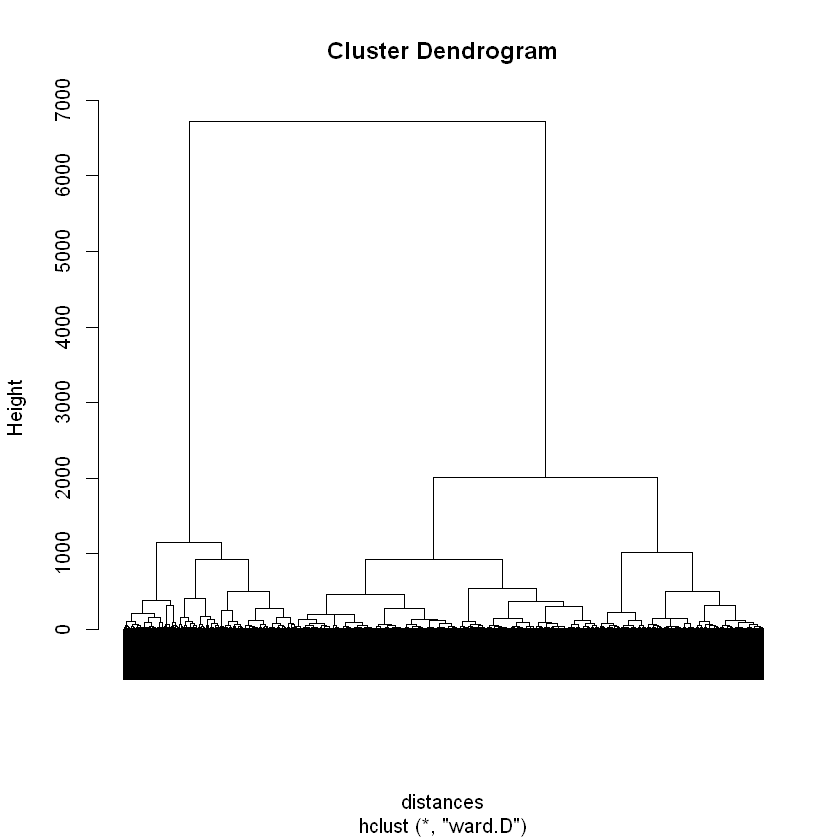

In [12]:
# Create Dendrogram

distances = dist(pointsnorm, method = "euclidean")

dend = hclust(distances, method = "ward.D")

plot(dend, labels = FALSE)

**What number of clusters is associated with a height of approximately 1500?**

Answer: 3 clusters, according to the Dendrogram.

**In our clustering, we want to set the number of clusters to 5. Which of the following statements is most correct?**

Answer: The number of clusters with the most vertical room on the dendogram is less than 5, but we want more specific clusters.

**Set the random seed to 200, and run the k-means clustering algorithm on your normalized dataset, setting the number of clusters to 5.**

In [13]:
# K-means Clustering

set.seed(200)

kmc = kmeans(pointsnorm, centers = 5)

In [14]:
# Divides the dataset into 5 different subsets for each cluster

KmeansCluster1 = subset(pointsnorm, kmc$cluster == 1)

KmeansCluster2 = subset(pointsnorm, kmc$cluster == 2)

KmeansCluster3 = subset(pointsnorm, kmc$cluster == 3)

KmeansCluster4 = subset(pointsnorm, kmc$cluster == 4)

KmeansCluster5 = subset(pointsnorm, kmc$cluster == 5)

**How many observations are in the smallest cluster?**

In [15]:
table(kmc$cluster)


   1    2    3    4    5 
2086  748 3965 1403  942 

In [16]:
# Or
nrow(KmeansCluster1)
nrow(KmeansCluster2)
nrow(KmeansCluster3)
nrow(KmeansCluster4)
nrow(KmeansCluster5)

[1] 2086

[1] 748

[1] 3965

[1] 1403

[1] 942

Answer: 748 observations are present in the smallest cluster, which is Cluster 2.

### Conceptual Questions
**If we ran k-means clustering a second time without making any additional calls to set.seed, we would expect:**

Answer: Different results from the first time.

**If we ran k-means clustering a second time after calling set.seed(200), we would expect:**

Answer: The same results from the first time.

**Why do we typically use cluster centroids to describe the clusters?**

Answer: The cluster centroid captures the average behavior in the cluster, and can be used to summarize the general pattern in the cluster.

**Is “overfitting” a problem in clustering?**

Answer: Yes, at the extreme every data point can be assigned to its own cluster.

**Is “multicollinearity” a problem in clustering?**

Answer: Yes, multicollinearity could cause certain features to be overweighted in the distances calculations.

### Understanding the Clusters

In [17]:
# Cluster 1
tail(sort(colMeans(KmeansCluster1)))

adventure    horror      imax  thriller    action    sci.fi 
0.2811574 0.3362149 0.4692320 0.4924846 0.5482285 0.5567702

In [18]:
# Cluster 2
tail(sort(colMeans(KmeansCluster2)))

animation  thriller    sci.fi    action   fantasy adventure 
 1.624056  1.760436  1.946086  1.998269  2.060513  2.112335

In [19]:
# Cluster 3
tail(sort(colMeans(KmeansCluster3)))

musical         war     romance     western documentary   film.noir 
 -0.3640855  -0.3545323  -0.3339994  -0.3195028  -0.1664117  -0.1183020

In [20]:
# Cluster 4
tail(sort(colMeans(KmeansCluster4)))

comedy adventure   fantasy   musical animation  children 
0.2774392 0.3803612 0.6401389 0.8539000 0.8861815 1.1076461

In [21]:
# Cluster 5
tail(sort(colMeans(KmeansCluster5)))

mystery   romance     crime       war film.noir     drama 
 1.367318  1.373039  1.381170  1.484580  1.570508  1.842013

**Which of the clusters is best described as “users who like dramas, film noir, war movies, and crime movies?”**

Answer: Cluster 5.

**Which of the clusters is best described as “users who like adventure movies, fantasy movies, and action movies?”**

Answer: Cluster 2.

**What genre contributes least to the cluster described as “users who like adventure movies, fantasy movies, and action movies?”**

In [22]:
# Sort the genres in cluster 2
sort(colMeans(KmeansCluster2))

film.noir documentary     western     musical         war     romance 
 0.07795089  0.40774319  0.75290085  0.81680961  0.85191137  0.91250076 
      drama      horror     mystery       crime    children        imax 
 1.02087709  1.30848371  1.37590769  1.41827161  1.48784813  1.53614219 
     comedy   animation    thriller      sci.fi      action     fantasy 
 1.59560054  1.62405592  1.76043592  1.94608569  1.99826943  2.06051329 
  adventure 
 2.11233488

Answer: filme.noir.